In [69]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl

In [85]:
"""
This example shows how images are represented using pixels, color channels and data types.
"""

# read image as array
im = np.array(Image.open('./data/white.jpg'))
print("Shape is: {0} of type {1}".format(im.shape, im.dtype))

# read grayscale version to float array
im = np.array(Image.open('./data/white.jpg').convert('L'),'f')
print("Shape is: {0} of type {1}".format(im.shape, im.dtype))

# visualize the pixel value of a small region
col_1, col_2 = 30, 90
row_1, row_2 = 120, 180

# col_1, col_2 = 1, 80
# row_1, row_2 = 1, 60

# crop using array slicing
crop = im[col_1:col_2,row_1:row_2]
cols, rows = crop.shape

print("Created crop of shape: {0}".format(crop.shape))

Shape is: (168, 300, 3) of type uint8
Shape is: (168, 300) of type float32
Created crop of shape: (60, 60)


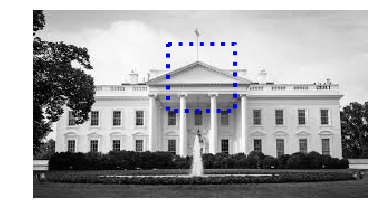

In [95]:
# generate all the plots
pl.figure()
pl.imshow(im)
pl.gray()
pl.plot([row_1, row_2, row_2, row_1, row_1], [col_1, col_1, col_2, col_2, col_1], 'b:', linewidth=4)
pl.axis('off')
pl.show()

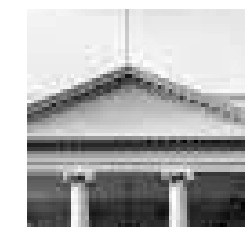

In [87]:
pl.figure()
pl.imshow(crop)
pl.gray()
pl.axis('off')
pl.show()

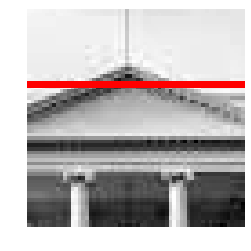

In [88]:
pl.figure()
pl.imshow(crop)
pl.gray()
pl.plot(20*np.ones(cols),'rs', linewidth=2)
pl.axis('off')
pl.show()

In [89]:
print(10*np.ones(cols)) 
range(10)

[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10.]


range(0, 10)

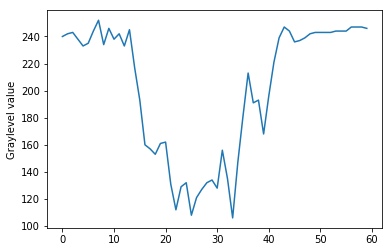

In [90]:
pl.figure()
pl.plot(crop[20,:])
pl.ylabel("Graylevel value")
pl.show()

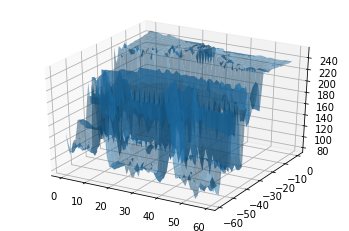

In [91]:
from mpl_toolkits.mplot3d import axes3d
fig = pl.figure()
ax = fig.gca(projection='3d')
# surface plot with transparency 0.5
X,Y = np.meshgrid(np.arange(cols),-np.arange(rows)) 
ax.plot_surface(X, Y, crop, alpha=0.5, cstride=2, rstride=2)
pl.show()

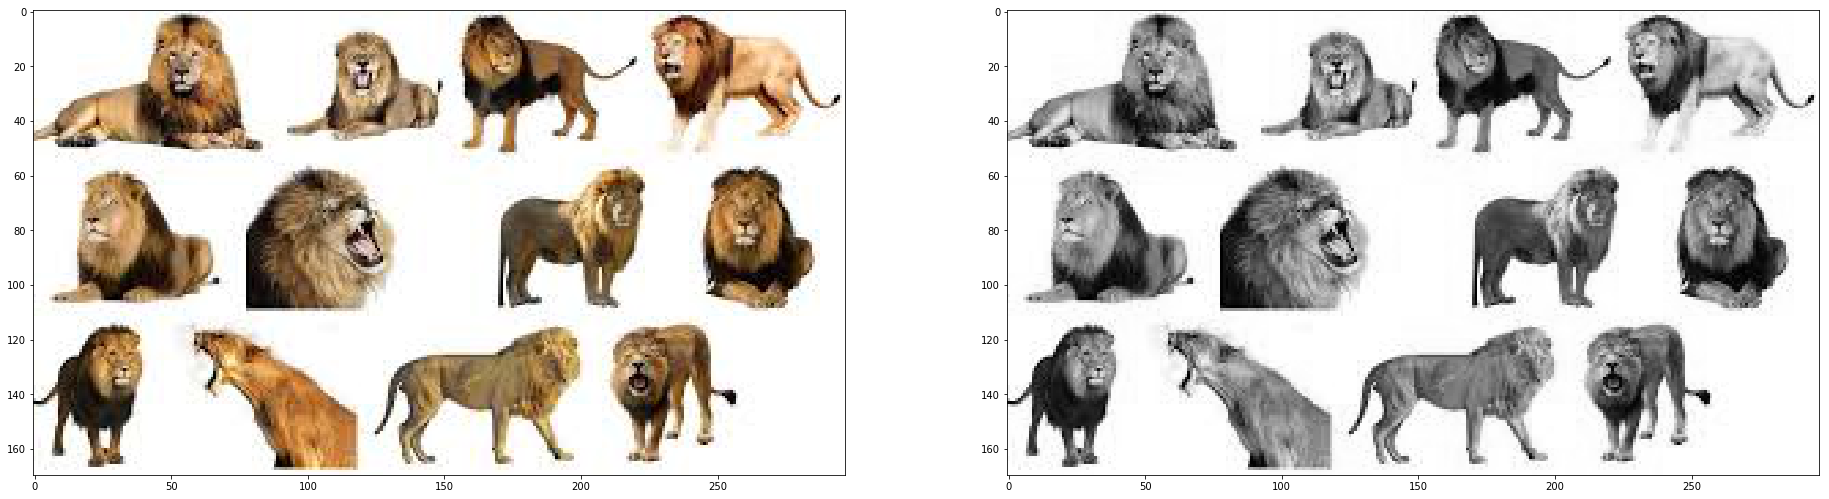

In [109]:
from PIL import Image
from numpy import *
from scipy.ndimage import measurements,morphology
from pylab import *

"""
This is the morphology counting objects example in Section 1.4.
"""

# load image and threshold to make sure it is binary
img = array(Image.open('./data/lions.jpg'))
im = array(Image.open('./data/lions.jpg').convert('L'))

fig, axs = subplots(1, 2, figsize=(32, 32))
axs[0].imshow(img)
# axs[0].axis('off')
axs[1].imshow(im)
# axs[1].axis('off')
pl.show();

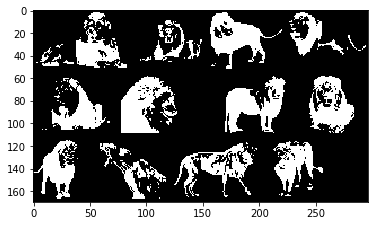

Number of objects: 277
Number of objects: 1


In [103]:
im = (im<128)
pl.figure();
pl.imshow(im)
pl.show();

labels, nbr_objects = measurements.label(im)
print("Number of objects:", nbr_objects)

# morphology - opening to separate objects better
im_open = morphology.binary_opening(im,ones((9,5)),iterations=3) 

labels_open, nbr_objects_open = measurements.label(im_open)
print("Number of objects:", nbr_objects_open)